In [1]:
#prepare the environment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import sklearn
pd.show_versions()
#matplotlib.__version__
sklearn.__version__


INSTALLED VERSIONS
------------------
commit           : 2a7d3326dee660824a8433ffd01065f8ac37f7d6
python           : 3.6.4.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 18.7.0
Version          : Darwin Kernel Version 18.7.0: Mon Feb 10 21:08:45 PST 2020; root:xnu-4903.278.28~1/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.2
numpy            : 1.18.1
pytz             : 2017.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 46.0.0.post20200309
Cython           : 0.27.3
pytest           : 3.3.2
hypothesis       : None
sphinx           : 1.6.6
blosc            : None
feather          : None
xlsxwriter       : 1.0.2
lxml.etree       : 4.1.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10
IPython          : 6.2.1
pandas_datareader: N

'0.22.1'

In [2]:
!ls


Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
my_model.pkl
week10_percepton.ipynb
week1_lr.ipynb
week1_lr.ipynb.zip
week1_numpy.py
week2_lr_pandas.ipynb
week4_model_training.ipynb
week7_ensemble_learning_and_random_forests.ipynb


In [3]:
#load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [4]:
#explore the data
print(boston_dataset.keys())
print(boston_dataset['feature_names'])
print(boston_dataset['DESCR'])


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

Let's look at how the number of rooms (RM) affects the price (MEDV)
In our linear regression, MEDV will be our Y value.  RM will be our X value.  

In [6]:
#prepare the data
from sklearn.model_selection import train_test_split
num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test = train_test_split(boston_dataset.data[:,5].reshape(-1,1), boston_dataset.target.reshape(-1,1))
print(num_Rooms_Train.shape)
print(med_price_Train.shape)
print(num_Rooms_Test.shape)
print(num_Rooms_Test[0:10])

(379, 1)
(379, 1)
(127, 1)
[[6.137]
 [6.223]
 [7.079]
 [5.951]
 [6.006]
 [6.616]
 [5.834]
 [5.852]
 [6.405]
 [6.635]]


In [9]:
print(boston_dataset.data[:,5].shape)
print(boston_dataset.data[:,5])

(506,)
[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.

In [10]:
#implement linear regression model
from sklearn.linear_model import LinearRegression
price_room = LinearRegression()
print(type(price_room))
price_room.fit (num_Rooms_Train,med_price_Train)

<class 'sklearn.linear_model._base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#predict on linear regression model

print(price_room.predict(num_Rooms_Test[0].reshape(-1,1)))
print(price_room.predict(np.array([7.564,3.543,2.450]).reshape(-1,1)))
print(num_Rooms_Test[0])
print([7.564])
print(price_room.predict(num_Rooms_Test[5].reshape(-1,1)))
print(price_room.predict(num_Rooms_Test[1:10]))
med_price_pred = price_room.predict(num_Rooms_Test)      

[[21.5092507]]
[[ 33.96762411]
 [ -1.13757524]
 [-10.67997337]]
[6.137]
[7.564]
[[25.69114338]]
[[22.26007068]
 [29.73334863]
 [19.88538423]
 [20.3655598 ]
 [25.69114338]
 [18.86391983]
 [19.0210682 ]
 [23.84901529]
 [25.85702222]]


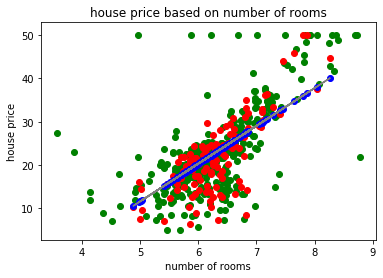

In [12]:
#Let's graph it:
#num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test

import matplotlib.pyplot as plt
plt.scatter(num_Rooms_Train, med_price_Train, color = 'green')
plt.scatter(num_Rooms_Test, med_Price_Test, color = 'red')   
plt.scatter(num_Rooms_Test, med_price_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(num_Rooms_Test, price_room.predict(num_Rooms_Test), color = 'gray')
plt.title('house price based on number of rooms')
plt.xlabel('number of rooms')
plt.ylabel('house price')
plt.show()

In [25]:
print('Coefficients: \n', price_room.coef_) 
print(f"Feature Coefficient: {price_room.coef_[0][0]}")

Coefficients: 
 [[8.7304649]]
Feature Coefficient: 8.730464896528225


In [14]:
from sklearn.metrics import mean_squared_error,r2_score

print('Mean squared error: %.2f' %mean_squared_error(med_Price_Test, med_price_pred))
rmse = np.sqrt(mean_squared_error(med_Price_Test, med_price_pred))
print('Root MSE: %.2f' %rmse)




Mean squared error: 32.65
Root MSE: 5.71


In [ ]:
# starter for group exercise

In [15]:
from sklearn.datasets import fetch_california_housing

In [16]:
cali_h = fetch_california_housing()


In [17]:
print(type(cali_h))

<class 'sklearn.utils.Bunch'>


In [18]:
cali_h.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [19]:
print(cali_h.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [21]:
cali_features, cali_label = fetch_california_housing(return_X_y=True)

In [22]:
print(cali_features[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [ ]:
#pick a feature
#why are you picking this feature?

In [ ]:
#split the features using numpy
#hint train = dataset[:-500]
#     test = dataset[-500:] 



In [ ]:
#create and train a linear regressor

In [ ]:
#print the coefficients, MSE, and RMSE

In [ ]:
#optional:
#graph it

In [ ]:
from sklearn.metrics import mean_squared_error,r2_scorefrom sklearn.metrics import mean_squared_error,r2_score

print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_train, diabetes_y_pred))
rmse = np.sqrt(mean_squared_error(diabetes_y_train, diabetes_y_pred))
print('Root MSE: %.2f' %rmse)print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_train, diabetes_y_pred))
rmse = np.sqrt(mean_squared_error(diabetes_y_train, diabetes_y_pred))
print('Root MSE: %.2f' %rmse)
